data about population is collected from https://simplemaps.com/data/in-cities 
#the definition of attributes population and population_proper is not clearly provided,but believed to be as follows:
 population_proper: native population of that city,ig people whose aadhar address is in that city
 population: estimated no.of people living in that city

In [ ]:
import numpy as np
import pandas as pd
data = pd.read_excel('/kaggle/input/population-in-cities-of-india/population.xlsx')
data = data[data['capital'] == 'admin']
data
##this data also include population of union territories 

city      lat      lng country iso2  \
0                 Delhi  28.6600  77.2300   India   IN   
1                Mumbai  18.9667  72.8333   India   IN   
2               Kolkāta  22.5411  88.3378   India   IN   
3             Bangalore  12.9699  77.5980   India   IN   
4               Chennai  13.0825  80.2750   India   IN   
5             Hyderābād  17.3667  78.4667   India   IN   
9               Lucknow  26.8470  80.9470   India   IN   
10               Jaipur  26.9167  75.8667   India   IN   
18               Bhopāl  23.2500  77.4167   India   IN   
20                Patna  25.6100  85.1414   India   IN   
36             Srīnagar  34.0911  74.8061   India   IN   
43               Rānchi  23.3556  85.3347   India   IN   
45           Chandīgarh  30.7353  76.7911   India   IN   
47               Raipur  21.2379  81.6337   India   IN   
52               Dispur  26.1500  91.7700   India   IN   
58         Bhubaneshwar  20.2644  85.8281   India   IN   
62   Thiruvananthapuram   8.5000  76.8997   India   IN   
77            Dehra Dūn  30.3180  78.0290   India   IN   
86             Agartala  23.8333  91.2667   India   IN   
149              Āīzawl  23.7104  92.7200   India   IN   
155              Imphāl  24.8200  93.9500   India   IN   
169          Puducherry  11.9300  79.8300   India   IN   
178              Shimla  31.1033  77.1722   India   IN   
191         Ghāndīnagar  23.2200  72.6800   India   IN   
242            Shillong  25.5744  91.8789   India   IN   
258          Port Blair  11.6667  92.7500   India   IN   
290             Gangtok  27.3300  88.6200   India   IN   
291              Kohīma  25.6667  94.1194   India   IN   
326            Itānagar  27.1000  93.6200   India   IN   
369              Panaji  15.4800  73.8300   India   IN   
372               Damān  20.4170  72.8500   India   IN   
403           Kavaratti  10.5626  72.6369   India   IN   

                      admin_name capital  population  population_proper  
0                          Delhi   admin  29617000.0         16753235.0  
1                    Mahārāshtra   admin  23355000.0         12478447.0  
2                    West Bengal   admin  17560000.0          4496694.0  
3                      Karnātaka   admin  13707000.0          8443675.0  
4                     Tamil Nādu   admin  11324000.0          6727000.0  
5                      Telangana   admin   9746000.0          6993262.0  
9                  Uttar Pradesh   admin   3382000.0          3382000.0  
10                     Rājasthān   admin   3073350.0          3073350.0  
18                Madhya Pradesh   admin   1883381.0          1883381.0  
20                         Bihār   admin   1684222.0          1684222.0  
36             Jammu and Kashmīr   admin   1180570.0          1180570.0  
43                     Jharkhand   admin   1073440.0          1073440.0  
45                    Chandīgarh   admin   1026459.0          1026459.0  
47                  Chhattīsgarh   admin   1010087.0          1010087.0  
52                         Assam   admin    957352.0           957352.0  
58                        Odisha   admin    837737.0           837737.0  
62                        Kerala   admin    743691.0           743691.0  
77                   Uttarakhand   admin    578420.0           578420.0  
86                       Tripura   admin    522613.0           522613.0  
149                      Mizoram   admin    283021.0           265331.0  
155                      Manipur   admin    268243.0           268243.0  
169                   Puducherry   admin    227411.0           227411.0  
178             Himāchal Pradesh   admin    206575.0           206575.0  
191                      Gujarāt   admin    195891.0           195891.0  
242                    Meghālaya   admin    143229.0           143229.0  
258  Andaman and Nicobar Islands   admin    127562.0           112050.0  
290                       Sikkim   admin    100286.0           100286.0  
291                     Nāgāland

In [ ]:
!pip install cartopy
import cartopy

/opt/conda/lib/python3.7/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/opt/conda/lib/python3.7/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/opt/conda/lib/python3.7/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_1_states_provinces_lakes.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


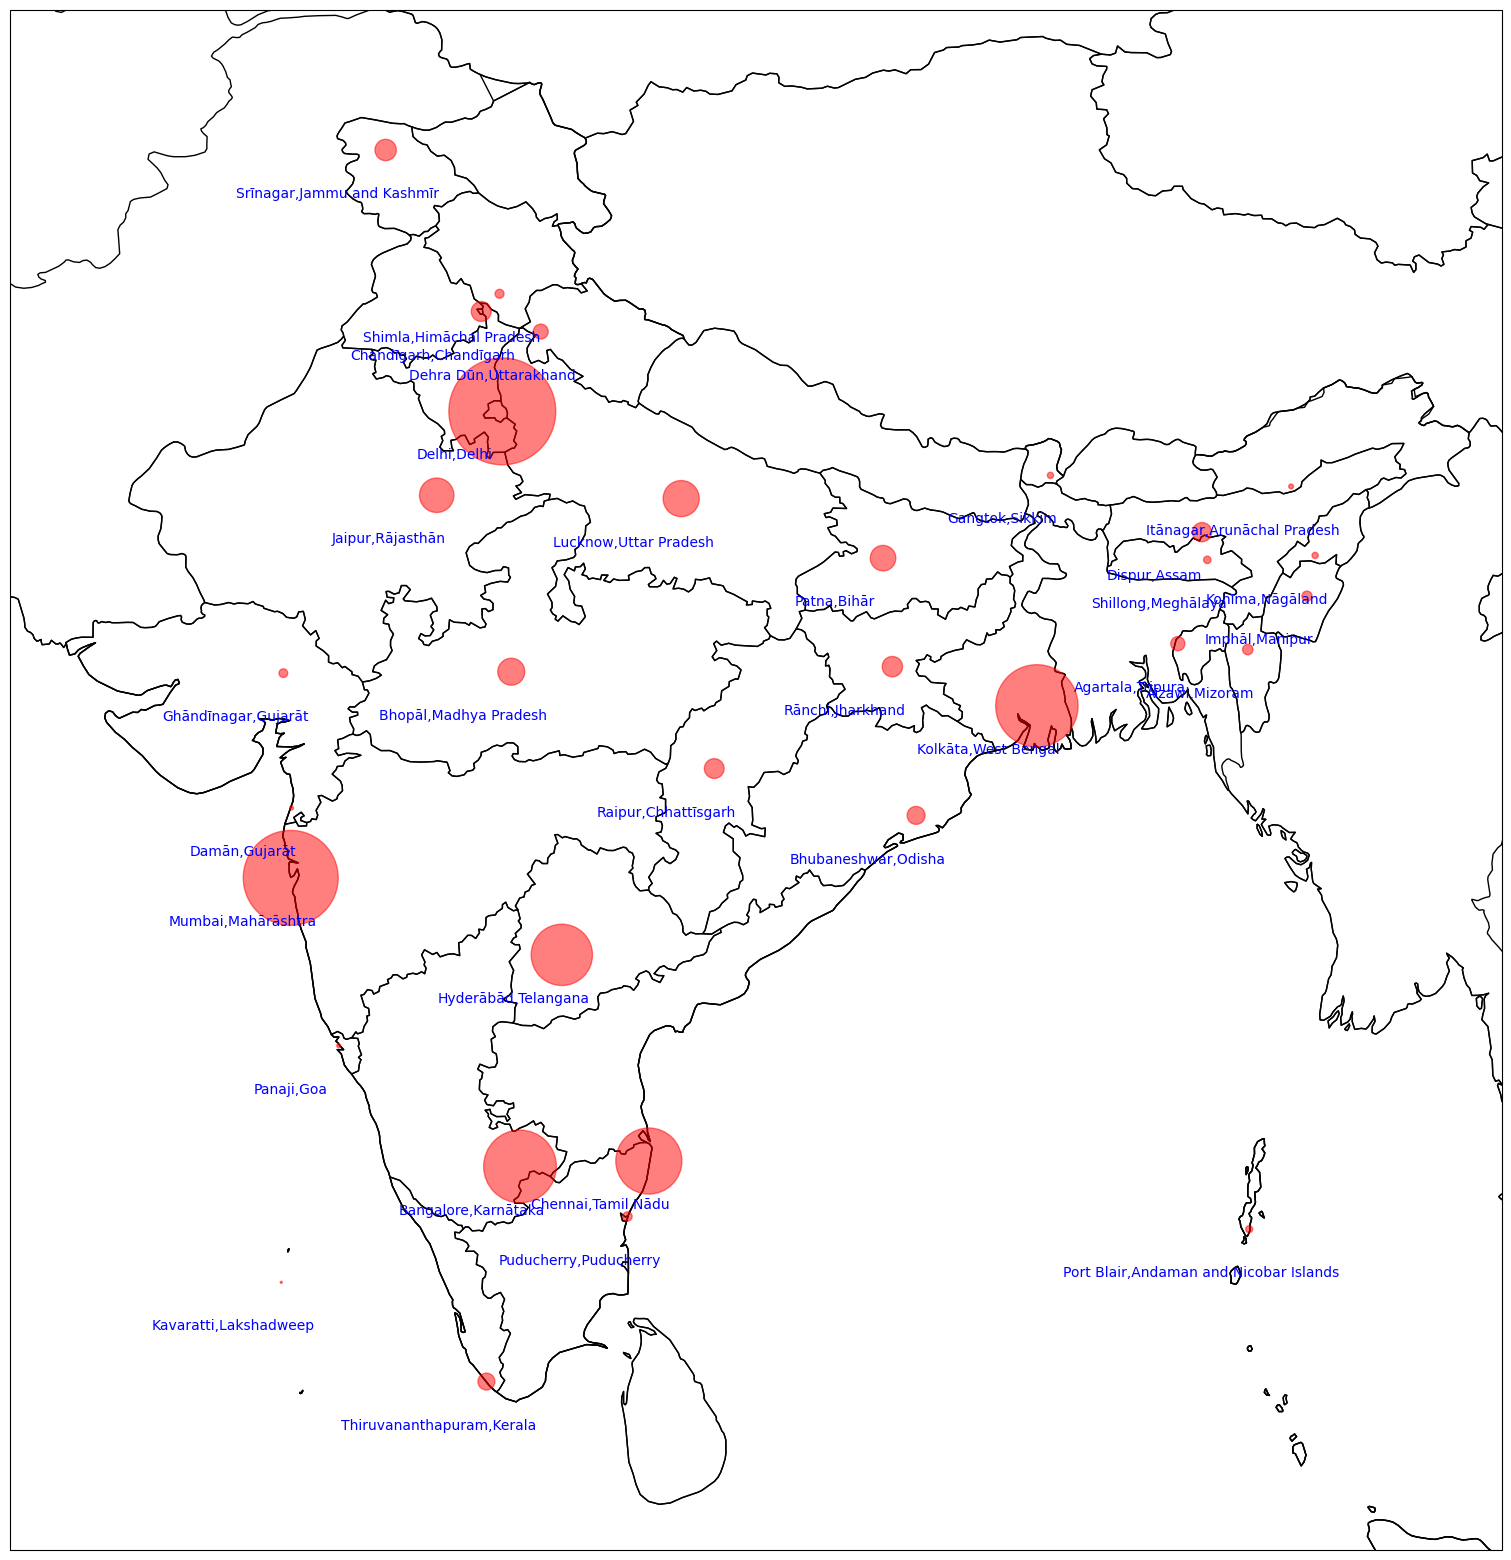

In [ ]:
##for the population
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as feature

#create india map with platecarree projection
map = plt.figure(figsize=(30, 20))
axes = map.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

axes.coastlines() ##add coastines
axes.add_feature(feature.BORDERS,edgecolor = 'black')#country borders
axes.add_feature(feature.STATES,edgecolor = 'black')#state borders
axes.add_feature(feature.COASTLINE)#coastline
axes.set_extent([67,98,5,37], crs=ccrs.PlateCarree())#fixing lat and longitudes to get indian map 
axes.scatter(data['lng'], data['lat'], s=data['population']/5000,
           transform=ccrs.PlateCarree(), alpha=0.5,color = 'red')

for i, row in data.iterrows():
    axes.annotate(row['city'] + ',' + row['admin_name'], (row['lng']-1, row['lat']-1)
                ,horizontalalignment='center', fontsize=10,color = 'blue',bbox= dict(color = 'none',lw=0.5))

# Show the plot
plt.show()
                  

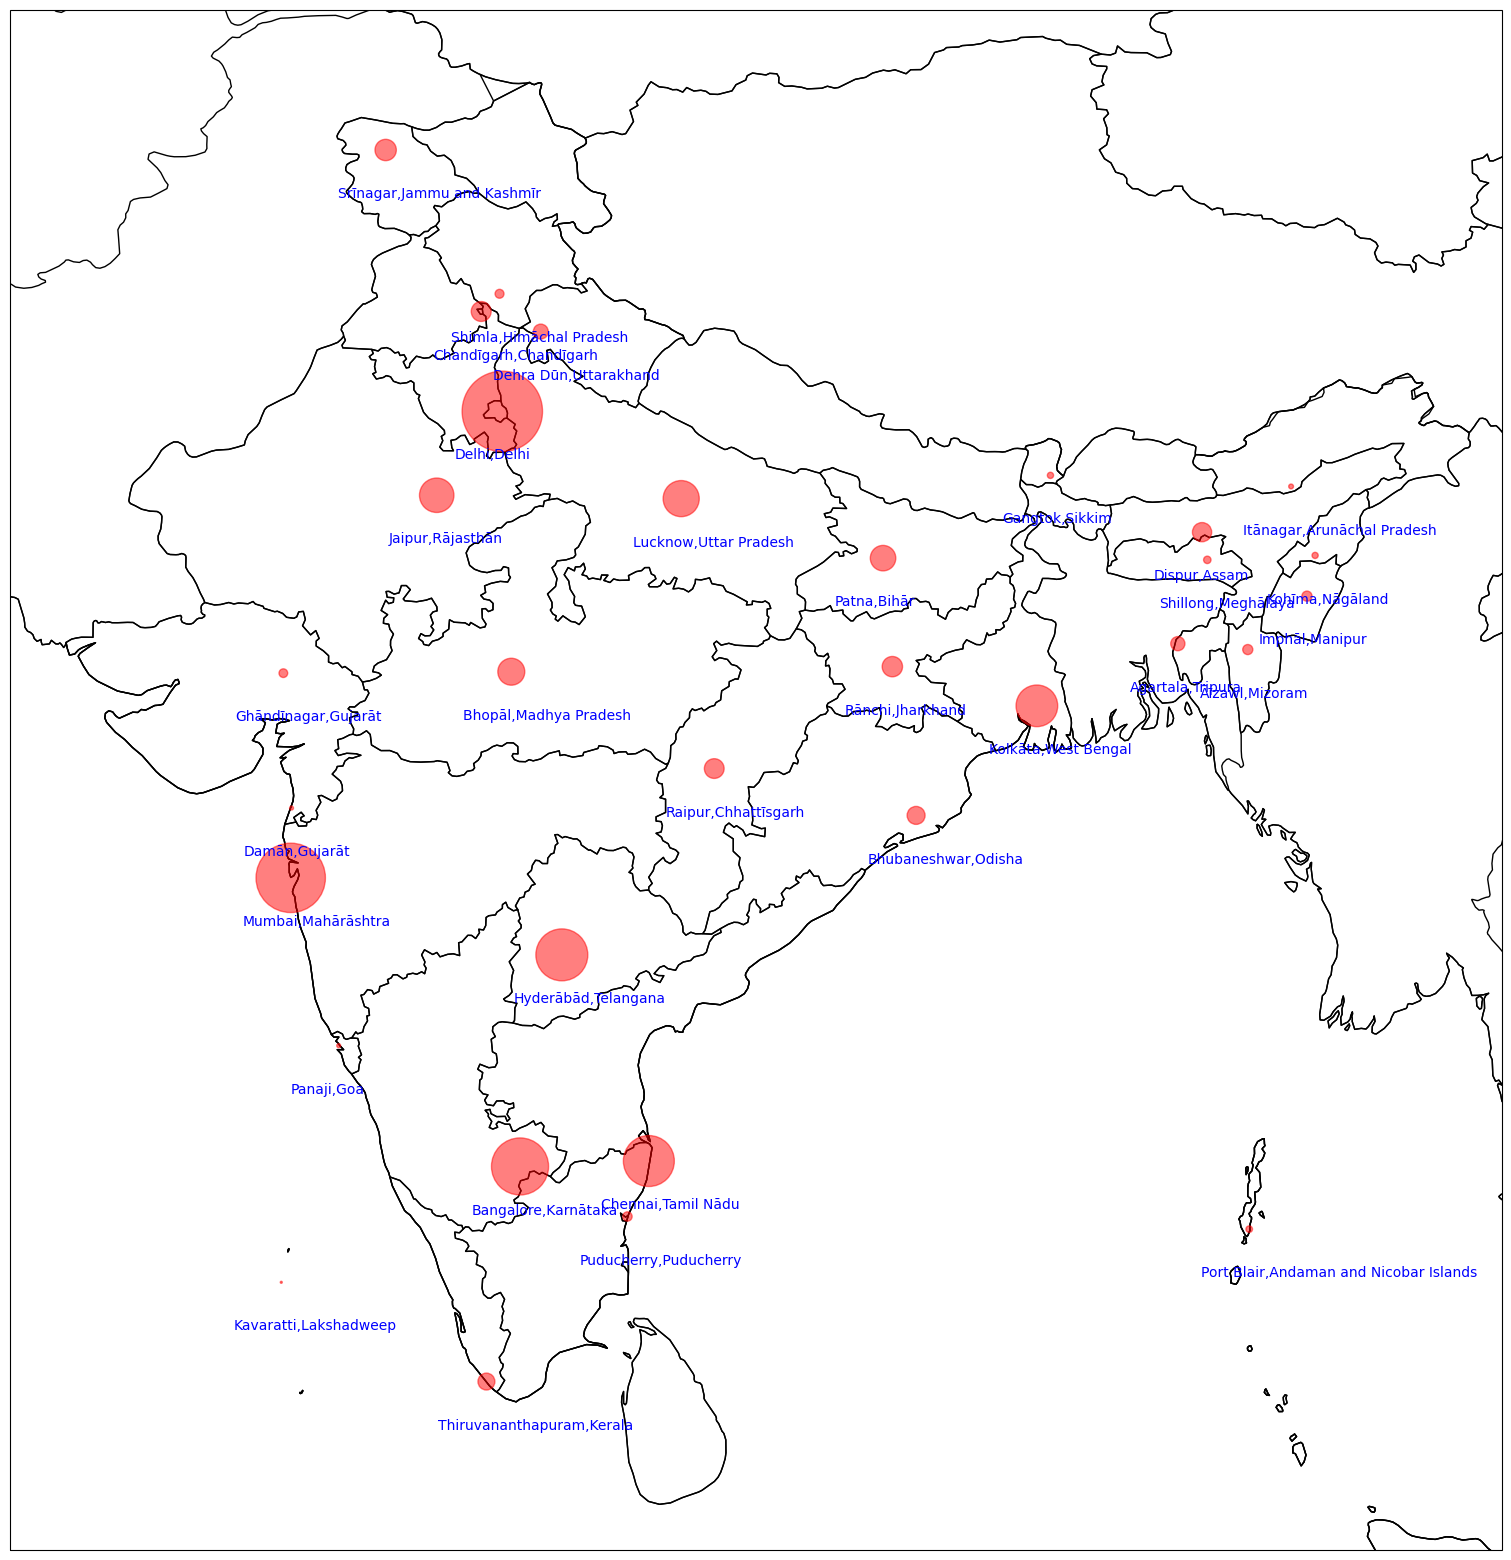

In [ ]:
#for population_proper
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as feature

#create india map with platecarree projection
map = plt.figure(figsize=(30, 20))
axes = map.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

axes.coastlines() ##add coastines
axes.add_feature(feature.BORDERS,edgecolor = 'black',linewidth=1)#country borders
axes.add_feature(feature.STATES,edgecolor = 'black')#state borders
axes.add_feature(feature.COASTLINE)#coastline
axes.set_extent([67,98,5,37], crs=ccrs.PlateCarree())#fixing lat and longitudes to get indian map 
axes.scatter(data['lng'], data['lat'], s=data['population_proper']/5000,
           transform=ccrs.PlateCarree(), alpha=0.5,color = 'red')

for i, row in data.iterrows():
    axes.annotate(row['city'] + ',' + row['admin_name'], (row['lng']-1, row['lat']-1)
                ,horizontalalignment='left', fontsize=10,color = 'blue')

# Show the plot
plt.show()

In [ ]:
import numpy as np
import pandas as pd

city      lat      lng country iso2  \
0                 Delhi  28.6600  77.2300   India   IN   
1                Mumbai  18.9667  72.8333   India   IN   
2               Kolkāta  22.5411  88.3378   India   IN   
3             Bangalore  12.9699  77.5980   India   IN   
4               Chennai  13.0825  80.2750   India   IN   
5             Hyderābād  17.3667  78.4667   India   IN   
9               Lucknow  26.8470  80.9470   India   IN   
10               Jaipur  26.9167  75.8667   India   IN   
18               Bhopāl  23.2500  77.4167   India   IN   
20                Patna  25.6100  85.1414   India   IN   
36             Srīnagar  34.0911  74.8061   India   IN   
43               Rānchi  23.3556  85.3347   India   IN   
45           Chandīgarh  30.7353  76.7911   India   IN   
47               Raipur  21.2379  81.6337   India   IN   
52               Dispur  26.1500  91.7700   India   IN   
58         Bhubaneshwar  20.2644  85.8281   India   IN   
62   Thiruvananthapuram   8.5000  76.8997   India   IN   
77            Dehra Dūn  30.3180  78.0290   India   IN   
86             Agartala  23.8333  91.2667   India   IN   
149              Āīzawl  23.7104  92.7200   India   IN   
155              Imphāl  24.8200  93.9500   India   IN   
169          Puducherry  11.9300  79.8300   India   IN   
178              Shimla  31.1033  77.1722   India   IN   
191         Ghāndīnagar  23.2200  72.6800   India   IN   
242            Shillong  25.5744  91.8789   India   IN   
258          Port Blair  11.6667  92.7500   India   IN   
290             Gangtok  27.3300  88.6200   India   IN   
291              Kohīma  25.6667  94.1194   India   IN   
326            Itānagar  27.1000  93.6200   India   IN   
369              Panaji  15.4800  73.8300   India   IN   
372               Damān  20.4170  72.8500   India   IN   
403           Kavaratti  10.5626  72.6369   India   IN   

                      admin_name capital  population  population_proper  
0                          Delhi   admin  29617000.0         16753235.0  
1                    Mahārāshtra   admin  23355000.0         12478447.0  
2                    West Bengal   admin  17560000.0          4496694.0  
3                      Karnātaka   admin  13707000.0          8443675.0  
4                     Tamil Nādu   admin  11324000.0          6727000.0  
5                      Telangana   admin   9746000.0          6993262.0  
9                  Uttar Pradesh   admin   3382000.0          3382000.0  
10                     Rājasthān   admin   3073350.0          3073350.0  
18                Madhya Pradesh   admin   1883381.0          1883381.0  
20                         Bihār   admin   1684222.0          1684222.0  
36             Jammu and Kashmīr   admin   1180570.0          1180570.0  
43                     Jharkhand   admin   1073440.0          1073440.0  
45                    Chandīgarh   admin   1026459.0          1026459.0  
47                  Chhattīsgarh   admin   1010087.0          1010087.0  
52                         Assam   admin    957352.0           957352.0  
58                        Odisha   admin    837737.0           837737.0  
62                        Kerala   admin    743691.0           743691.0  
77                   Uttarakhand   admin    578420.0           578420.0  
86                       Tripura   admin    522613.0           522613.0  
149                      Mizoram   admin    283021.0           265331.0  
155                      Manipur   admin    268243.0           268243.0  
169                   Puducherry   admin    227411.0           227411.0  
178             Himāchal Pradesh   admin    206575.0           206575.0  
191                      Gujarāt   admin    195891.0           195891.0  
242                    Meghālaya   admin    143229.0           143229.0  
258  Andaman and Nicobar Islands   admin    127562.0           112050.0  
290                       Sikkim   admin    100286.0           100286.0  
291                     Nāgāland

question 2


In [ ]:
import networkx as nx
data1 = pd.read_excel('/kaggle/input/flightschedule/Flightschedule (1).xlsx')
data1

Origin Destination Flight Number Departure Time Arrival Time  \
0     Abu Dhabi   Ahmedabad          G8 6          23:30        13:20   
1     Abu Dhabi   Ahmedabad          G8 6          23:30        13:20   
2     Abu Dhabi   Ahmedabad          G8 6          23:30        08:25   
3     Abu Dhabi   Ahmedabad          G8 6          23:30        08:25   
4     Abu Dhabi   Ahmedabad          G8 6          23:30        13:20   
...         ...         ...           ...            ...          ...   
4210   Varanasi      Phuket        G8 350          15:30        11:15   
4211   Varanasi      Phuket        G8 350          15:30        11:15   
4212   Varanasi      Phuket        G8 408          18:35        13:30   
4213   Varanasi      Ranchi        G8 408          19:05        11:25   
4214   Varanasi      Ranchi        G8 408          20:15        11:25   

     Flight Time  Routing Days Of Operations Connection Flight No  \
0          12:20  Via BOM     M,W,Th,F,Sa,Su              G8 2504   
1          12:20  Via BOM          W,F,Sa,Su              G8 2504   
2          07:25  Via BOM       Tu,W,F,Sa,Su               G8 365   
3          07:25  Via BOM              Daily               G8 365   
4          12:20  Via BOM     M,W,Th,F,Sa,Su              G8 2504   
...          ...      ...                ...                  ...   
4210       18:15  Via BOM              Daily                G8 21   
4211       18:15  Via BOM           M,W,F,Sa                G8 21   
4212       17:25  Via BLR     M,Tu,W,F,Sa,Su                G8 41   
4213       16:20  Via BLR              Daily               G8 374   
4214       15:10  Via BLR              Daily               G8 374   

     Effective From EffectiveTo  
0        2023-04-08  2023-04-09  
1        2023-04-10  2023-04-13  
2        2023-04-10  2023-04-13  
3        2023-04-14  2023-04-16  
4        2023-04-14  2023-04-16  
...             ...         ...  
4210     2023-04-28  2023-04-29  
4211     2023-04-30  2023-05-01  
4212     2023-04-25  2023-05-03  
4213     2023-04-08  2023-04-11  
4214     2023-04-10  2023-04-12  

[4215 rows x 11 columns]

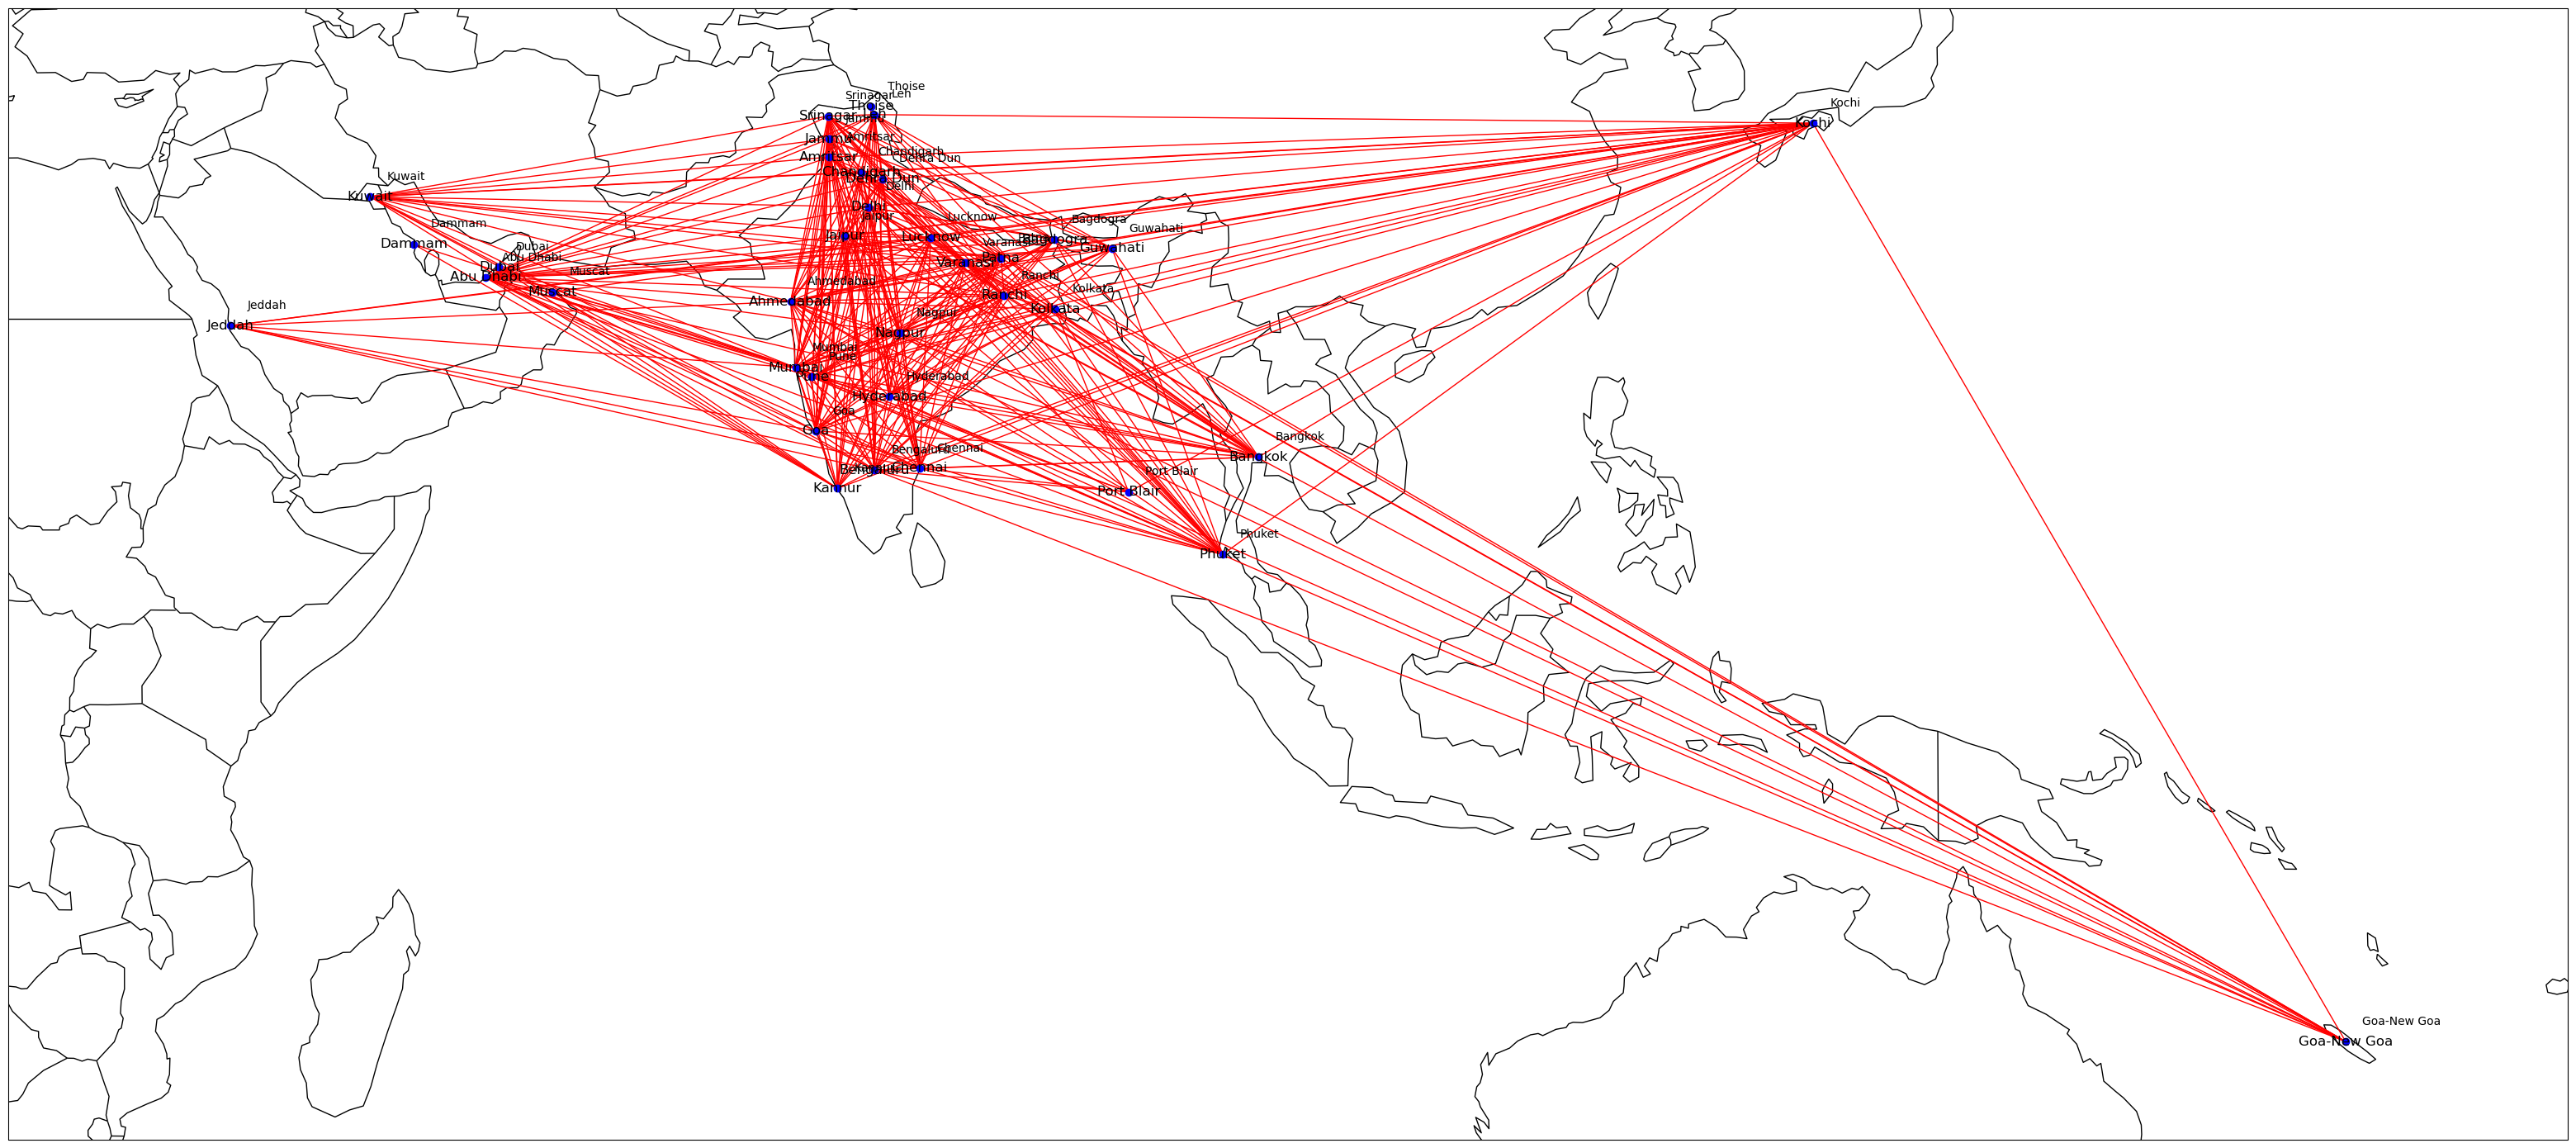

In [ ]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt


flightmap = plt.figure(figsize=(40, 30))
axes = flightmap.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
axes.add_feature(feature.BORDERS)
axes.add_feature(feature.COASTLINE)

airportcities = pd.concat([data1['Origin'],data1['Destination']]).unique()
G = nx.Graph()
for index, row in data1.iterrows():
    departure = row['Origin']
    destination = row['Destination']
    G.add_edge(departure, destination)

pos = {}
for city in airportcities:
    location = geocoder.geocode(city)
   
    if location:
        lng = location[0]['geometry']['lng']
        lat = location[0]['geometry']['lat']
        axes.plot(lng, lat, marker='o', markersize=6, color='blue', transform=ccrs.PlateCarree())
        axes.text(lng + 1, lat + 1, city, transform=ccrs.PlateCarree())

        pos[city] = (lng, lat)

# Plot the edges on the map
nx.draw_networkx(G, pos=pos, ax=axes, edge_color='red', node_size=0)

# Show the plot
plt.show()

    



In [ ]:
!pip install opencage

from opencage.geocoder import OpenCageGeocode
key = 'b18127058eb1455f85d2a0e131e1b00a'
geocoder = OpenCageGeocode(key)